# Geophysical tutorial: Step-by-step NMO correction

by [Leonardo Uieda](http://www.leouieda.com)

*This is a part of The Leading Edge [tutorials
series](https://dx.doi.org/10.1190/tle35020190.1).*

Open any text book about seismic data processing and you will inevitably find a
section about the Normal Moveout (NMO) correction.
When applied to a Common Mid Point (CMP) section, the correction is supposed to
turn the hyperbola associated with a reflection into a straight horizontal
line.
What most text books won't tell you is *how, exactly, do you apply this
equation to the data*?

That is what this tutorial will teach you (hopefully).

**Note**: This notebook is based on the material for my NMO and velocity analysis lecture of my [Intro Geophysics II](https://github.com/leouieda/geofisica2) course (in Portuguese).

## Running the code in this notebook

This is a [Jupyter notebook](http://jupyter.org/). It is divided into blocks called *cells*. Each cell can contain text formated in Markdown (like this one! click on it to see) or Python source code. Cells can be run individually by clicking on it and pressing `Shift+Enter`. Note that variables created in a cell are global to the notebook, they are not bound to a specific cell. Running Markdown cells will render the text nicely.

## Loading libraries

First, we need to load the libraries that make life so pleasant in Python-land.

In [10]:
%matplotlib notebook
import numpy as np               # For array based computations and world domination
import scipy.interpolate         # For the interpolation functions
import matplotlib.pyplot as plt  # For making plots

## Loading in a synthetic CMP

We'll use a synthetic CMP gather to test our NMO correction. I prepared this data set using a finite-difference acoustic wave propagation code that is currently under development for the [Fatiando a Terra](http://jupyter.org/) library (see [pull request 308](https://github.com/fatiando/fatiando/pull/308)).

The data are stored in a [compressed numpy format](https://docs.scipy.org/doc/numpy/reference/generated/numpy.savez_compressed.html) and can be loaded with `numpy.load`.

In [4]:
data = np.load('data/synthetic_cmp.npz')
print(data.keys())

['dt', 'offsets', 'CMP']


In [8]:
dt = data['dt']
offsets = data['offsets']
cmp = data['CMP']
nsamples = cmp.shape[0]
print('dt = {} s'.format(dt))
print('offsets =', offsets)
print('N samples = {}'.format(nsamples))
print('N offsets = {}'.format(cmp.shape[1]))

dt = 0.00045678391959799 s
offsets = [120 180 240 300 360 420 480 540 600 660 720 780 840 900]
N samples = 1200
N offsets = 14


Let's visualize our CMP gather using matplotlib.

<IPython.core.display.Javascript object>


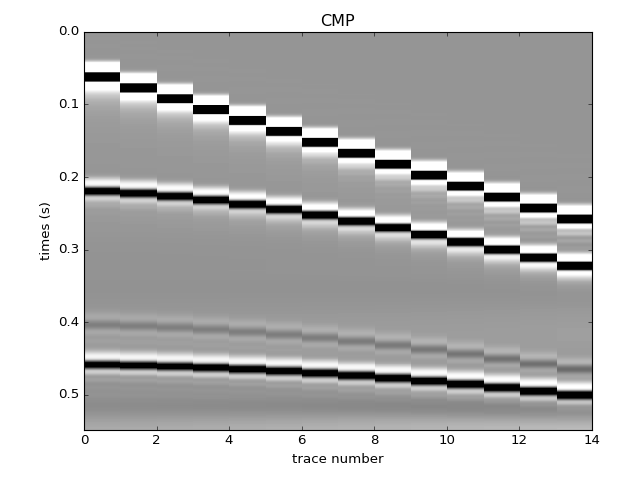

In [23]:
fig = plt.figure(figsize=(8, 6))
ax = plt.subplot(111)
ax.set_title('CMP')
ax.set_xlabel('trace number')
ax.set_ylabel('times (s)')
cutoff = 0.1
ax.imshow(cmp, extent=[0, len(offsets), dt*nsamples, 0], 
          aspect=20, cmap='Greys', vmin=-cutoff, vmax=cutoff, 
          interpolation='nearest')
fig.tight_layout()